# Problem Statement
Build a model which predicts sales based on the money spent on different platforms for marketing.

# Data
Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

# Reading and Understanding the Data


In [1]:
# Importing Packages 

import numpy as np 
import pandas as pd

# Data Visualization 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the given CSV file 

advertising = pd.read_csv("C:/Users/vishu/OneDrive/Documents/OneDrive/Desktop/Advertising.csv")
advertising.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


# Replace 'column_name_to_remove' with the actual name of the column you want to remove

df = pd.read_csv('C:/Users/vishu/OneDrive/Documents/OneDrive/Desktop/Advertising.csv')

column_name_to_remove = 'Unnamed: 0'

df.drop(columns=[column_name_to_remove], inplace=True)

# Save the modified DataFrame back to a new CSV file
df.to_csv('C:/Users/vishu/OneDrive/Documents/OneDrive/Desktop/Advertising.csv', index=False)


# Data Inspection 

In [5]:
advertising.shape

(200, 4)

In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# checking the null values 
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

C:\Users\vishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\vishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


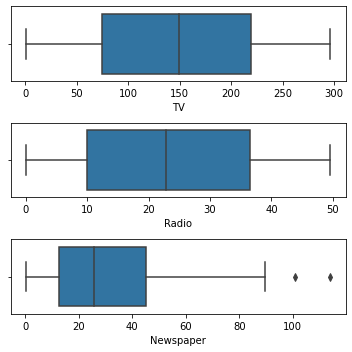

In [12]:
# Outlier Analysis 
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'],ax = axs[0])
plt2 = sns.boxplot(advertising['Radio'],ax = axs[1])
plt3 = sns.boxplot(advertising['Newspaper'],ax = axs[2])
plt.tight_layout()


In [13]:
# There are no considerable outliers present in the data.


# Exploratory Data Analysis

## Univariate Analysis 


## sales(target Variable)

C:\Users\vishu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


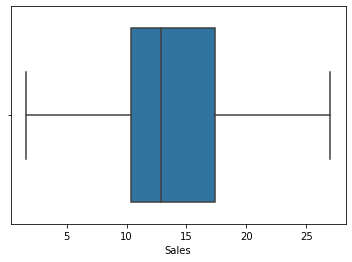

In [20]:
sns.boxplot(advertising['Sales'])
plt.show()

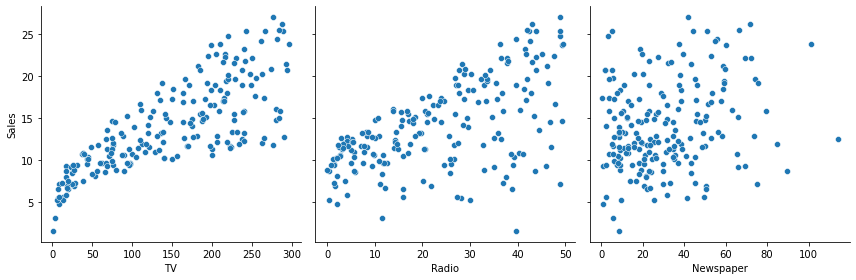

In [44]:
# lets see how sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect =1, kind='scatter')
plt.tight_layout()
plt.show()

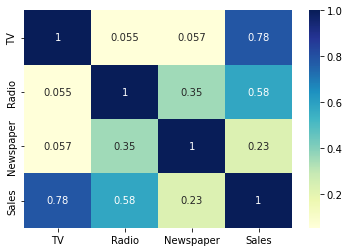

In [48]:
# Lets see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As it is visible from the pairplot and the heatmap , the variable Tv seems to most correlated with Sales. So lets go ahead and perform simple linear regression using Tv as our feature variable.

# Model Building

# Perform Simple Linear Regression 

Equation of linear regression

y=c+m1x1+m2x2+...+mnxn

y is the response

c is the intercept

m1 is the coefficient for the first feature

mn is the coefficient for the nth feature

In our case:

y=c+m1×TV

The m values are called the model coefficients or model parameters.

Generic Steps in model building using statsmodels

We first assign the feature variable, TV, 

in this case, to the variable X and the response variable, Sales, to the variable y

In [64]:
X = advertising['TV']
y = advertising['Sales']

# Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test=train_test_split(X,y,train_size=0.7, test_size=0.3,random_state=100)


In [66]:
# Lets now take a look at the train dataset
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [68]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

# Building a Linear Model
you first need to import the statsmodel.api     library using which you will perform the linear regression 

In [69]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [70]:
# Add  a constant to get an intercept 
X_train_sm = sm.add_constant(X_train)

# Fit the regression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [72]:
# print the parameters , ie the intercept and the slope of the regression line fitted 
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [73]:
# performing a summary operation lists out all the different parameters of the regression line fitted 
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           2.84e-30
Time:                        14:40:36   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

## Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.046, with a very low p value

The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.613

Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)

Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.948+0.046×TV

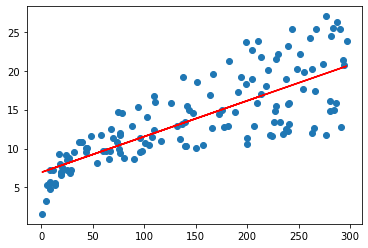

In [77]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + 0.046*X_train, 'r' )
plt.show()

## Model Evaluation
## Residual analysis

To validate assumptions of the model, and hence the reliability for inference

# Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

C:\Users\vishu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


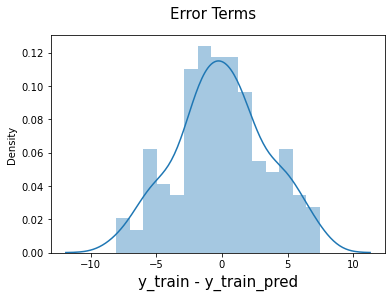

In [90]:
fig = plt.figure()

sns.distplot(res, bins = 15)
fig.suptitle('Error Terms',fontsize = 15)             # plot Heading
plt.xlabel('y_train - y_train_pred',fontsize = 15)      # X-Label
plt.show()

 The residuals are following the normally distributed with a mean 0. All good!

# Looking for patterns in the residuals

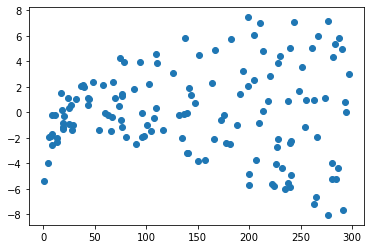

In [91]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

# Predictions on the Test Set


Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [92]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)

# predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [93]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [95]:
# returns the mean squared error; we will take a square root 
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327016

Checking the R-squred on the test set


In [97]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.59429872677833

Visualizing the fit on the test set


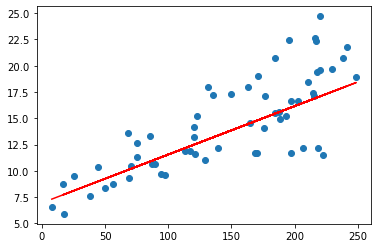

In [99]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 6.948 + 0.046 * X_test, 'r' )
plt.show()